<a href="https://colab.research.google.com/github/hanselkane/ML-Telyu/blob/main/Week%201/ML_Telyu_Week_1_House_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [156]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import explained_variance_score
from sklearn.metrics import confusion_matrix
import pandas as pd

import requests
import io
# Downloading the csv file from your GitHub account
url = "https://raw.githubusercontent.com/hanselkane/ML-Telyu/main/Week%201/kc_house_data.csv" # Make sure the url is the raw version of the file on GitHub
download = requests.get(url).content

# Reading the downloaded content and turning it into a pandas dataframe
df = pd.read_csv(io.StringIO(download.decode('utf-8')))

# Printing out the first 5 rows of the dataframe
print(df.columns)

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')


In [157]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [158]:
# df = df.set_index('id')
df.sort_index(0, inplace=True)
print(df)

               id             date  ...  sqft_living15  sqft_lot15
0      7129300520  20141013T000000  ...           1340        5650
1      6414100192  20141209T000000  ...           1690        7639
2      5631500400  20150225T000000  ...           2720        8062
3      2487200875  20141209T000000  ...           1360        5000
4      1954400510  20150218T000000  ...           1800        7503
...           ...              ...  ...            ...         ...
21608   263000018  20140521T000000  ...           1530        1509
21609  6600060120  20150223T000000  ...           1830        7200
21610  1523300141  20140623T000000  ...           1020        2007
21611   291310100  20150116T000000  ...           1410        1287
21612  1523300157  20141015T000000  ...           1020        1357

[21613 rows x 21 columns]


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.sort_index will be keyword-only
  


In [159]:
# Fix date value to make it usable
df['date'] = pd.to_datetime(df['date'])
print(df['date'])

0       2014-10-13
1       2014-12-09
2       2015-02-25
3       2014-12-09
4       2015-02-18
           ...    
21608   2014-05-21
21609   2015-02-23
21610   2014-06-23
21611   2015-01-16
21612   2014-10-15
Name: date, Length: 21613, dtype: datetime64[ns]


In [160]:
# Feature Engineering
# 1) Extract age from features
df['date_year'] = df.date.dt.year
print(df['date_year'])

0        2014
1        2014
2        2015
3        2014
4        2015
         ... 
21608    2014
21609    2015
21610    2014
21611    2015
21612    2014
Name: date_year, Length: 21613, dtype: int64


In [161]:
df['age_built'] = df['date_year'] - df['yr_built']
df['age_built']

0        59
1        63
2        82
3        49
4        28
         ..
21608     5
21609     1
21610     5
21611    11
21612     6
Name: age_built, Length: 21613, dtype: int64

In [162]:
# Drop irrelevant datas
to_remove = [
    'date',
    'lat',
    'long',
    'yr_built',
    'yr_renovated',
    'date_year'
]

cleaned_df = df.drop(columns=to_remove)
cleaned_df

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,sqft_living15,sqft_lot15,age_built
0,7129300520,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,98178,1340,5650,59
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,98125,1690,7639,63
2,5631500400,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,98028,2720,8062,82
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,98136,1360,5000,49
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,98074,1800,7503,28
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,98103,1530,1509,5
21609,6600060120,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,98146,1830,7200,1
21610,1523300141,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,98144,1020,2007,5
21611,291310100,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,98027,1410,1287,11


In [163]:
cleaned_df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,sqft_living15,sqft_lot15,age_built
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,98077.939805,1986.552492,12768.455652,43.317818
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,53.505026,685.391304,27304.179631,29.375493
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,98001.000000,399.000000,651.000000,-1.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,98033.000000,1490.000000,5100.000000,18.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,98065.000000,1840.000000,7620.000000,40.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,98118.000000,2360.000000,10083.000000,63.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,98199.000000,6210.000000,871200.000000,115.000000


In [164]:
cleaned_df.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,zipcode,sqft_living15,sqft_lot15,age_built
id,1.000000,-0.016762,0.001286,0.005160,-0.012258,-0.132109,0.018525,-0.002721,0.011592,-0.023783,0.008130,-0.010842,-0.005151,-0.008224,-0.002901,-0.138798,-0.021217
price,-0.016762,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,-0.053203,0.585379,0.082447,-0.053951
bedrooms,0.001286,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,-0.152668,0.391638,0.029244,-0.154324
bathrooms,0.005160,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,-0.203866,0.568634,0.087175,-0.506407
sqft_living,-0.012258,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,-0.199430,0.756420,0.183286,-0.318488
sqft_lot,-0.132109,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,-0.129574,0.144608,0.718557,-0.052990
floors,0.018525,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,-0.059121,0.279885,-0.011269,-0.489640
waterfront,-0.002721,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,0.030285,0.086463,0.030703,0.026093
view,0.011592,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,0.084827,0.280439,0.072575,0.053458
condition,-0.023783,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,0.003026,-0.092824,-0.003406,0.360665


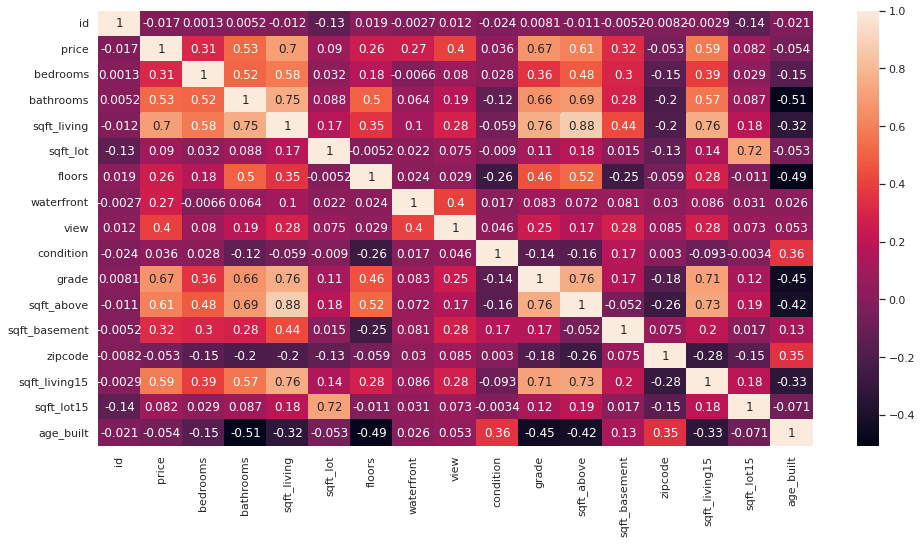

In [165]:
import seaborn as sns
sns.set(rc={'figure.figsize':(16,8)})
import matplotlib.pyplot as plt

sns.heatmap(cleaned_df.corr(), annot=True)
plt.show()

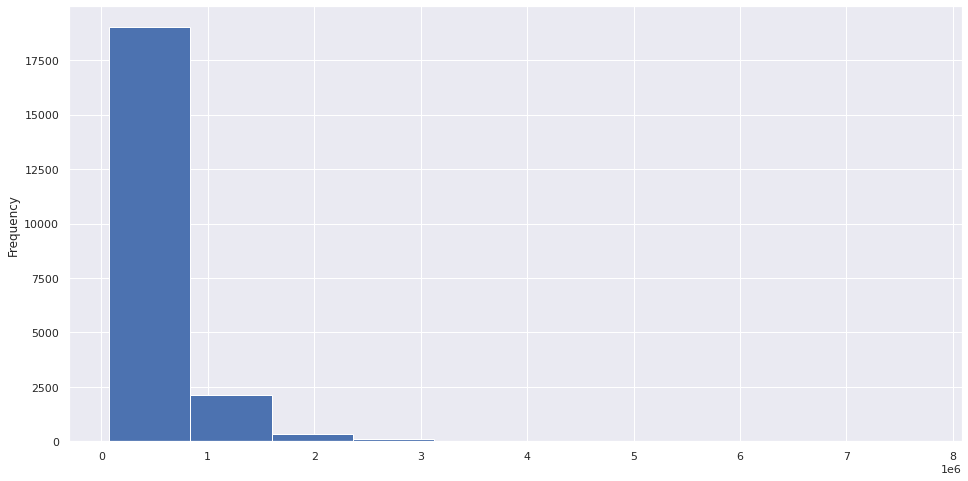

In [166]:
cleaned_df.price.plot.hist()

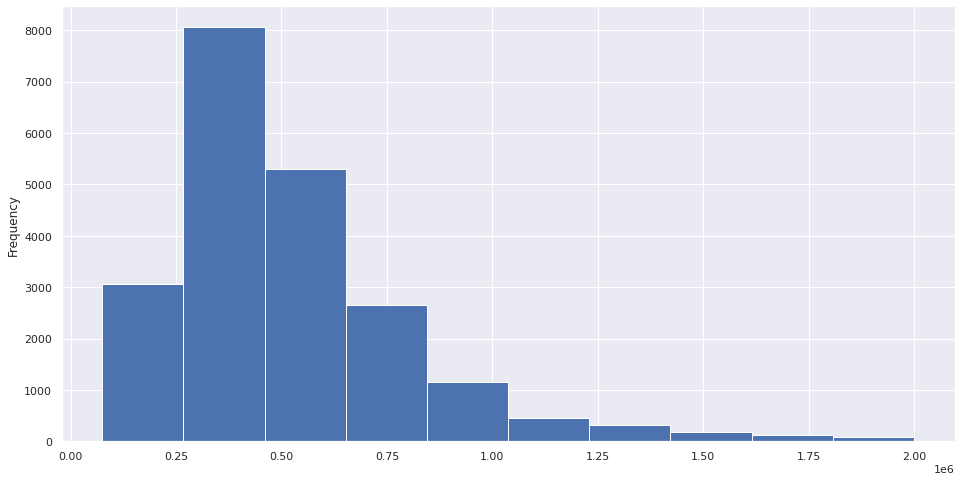

In [167]:
# Remove outliers, basically datas above 2 million in price
cleaned_df = cleaned_df[cleaned_df.price <= 2e6]
cleaned_df.price.plot.hist()

In [168]:
# Split the features and the label
X = cleaned_df.drop('price',1)
y = cleaned_df['price']

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  


In [169]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

In [170]:
# Feature scaling
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
# Fit transform actually center the data, 
# taking mean and std into consideration
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [171]:
print("Total training data: ",len(X_train))
print("Total test data: ",len(X_test))
print("Total factor/labels: ",len(X_train[0]))

Total training data:  19273
Total test data:  2142
Total factor/labels:  16


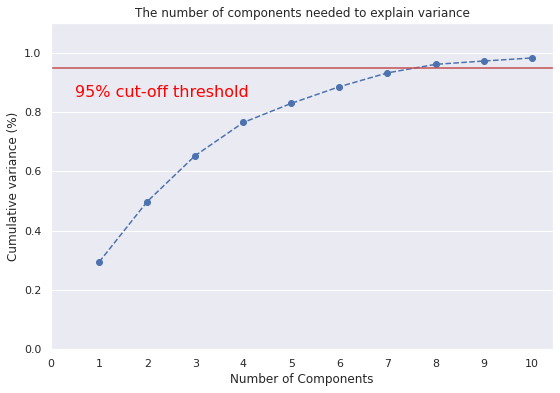

In [172]:
# PCA is Principal Component Analysis

# So, this is basically... we want to drop some of the factors,
# under the assumption that... some factors don't contribute much
# to the final result.
# In the plot figure, the x-axis is about how many componenets.
# Let's say 4 components, could only explain 80% of variations in result.
# Too many components, like 9 / 10 would start including components that
# doesn't really have siginificant impact on the final result

from sklearn.decomposition import PCA
pca = PCA(n_components = 10).fit(X_train)

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (9,6) # figure size (in inches)

fig, ax = plt.subplots()
xi = np.arange(1, 11, step=1) # create an array ranging from 1 to 11 with step 1
yi = np.cumsum(pca.explained_variance_ratio_) # Totaling the variance from every component

plt.ylim(0.0,1.1) # Limit the y-axis, min is 0 and max is 1.1
plt.plot(xi, yi, marker='o', linestyle='--', color='b') # Display setting for drawing plot

plt.xlabel('Number of Components')
plt.xticks(np.arange(0, 11, step=1)) #change from 0-based array index to 1-based human-readable label
plt.ylabel('Cumulative variance (%)')
plt.title('The number of components needed to explain variance')

plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% cut-off threshold', color = 'red', fontsize=16)

ax.grid(axis='x')
plt.show()

In [173]:
# feature extraction
pca = PCA(n_components=0.95) # if you provide float between 0-1, like this,
# it would become the %threshold
pca = pca.fit(X_train) # Here, we actually define the pca class

print(pca)

X_train = pca.transform(X_train) # Transform datas according to the fitted pca class
X_test = pca.transform(X_test)

# summarize components
print("Explained Variance: %s" % pca.explained_variance_ratio_) # Variance is dispersion of the mean
print(pca.components_)

PCA(n_components=0.95)
Explained Variance: [0.29446106 0.20365313 0.1552451  0.11161229 0.0645244  0.05618422
 0.04662786 0.02870241]
[[ 5.30838679e-02  2.45255525e-02  1.88201044e-01  1.91951043e-01
   7.57627057e-03  4.00101437e-01 -5.83046856e-03 -4.40447270e-03
  -1.61404270e-01  1.71979322e-01  2.21590502e-01 -5.30488149e-02
  -4.76572204e-01  2.01896855e-01  1.12415434e-02 -6.23353255e-01]
 [ 9.97841039e-01 -2.19440491e-03 -1.21721971e-02 -2.01247365e-02
  -1.19127704e-02 -9.27239362e-03  1.81455288e-03  1.64210516e-02
  -6.34416200e-03 -8.97546629e-03 -1.99771879e-02 -1.55735247e-03
   3.99417849e-02 -1.65574833e-02 -1.57328866e-02  2.48012358e-02]
 [-2.23236677e-02  4.51647139e-03  1.03663605e-01  9.20803898e-02
  -7.01131117e-03  4.43819596e-01  2.74532355e-02  1.70929702e-01
  -1.91779270e-01  1.01541898e-01  9.88724999e-02 -9.20603298e-03
   8.18353764e-01  4.41762785e-02 -1.02863823e-02 -1.56683995e-01]
 [ 6.67995288e-03  4.48426079e-02  1.60884485e-01  3.32480826e-01
   1.

In [174]:
len((X_train[0]))
# TODO: print what columns factor/label are left ??

8

In [175]:
from sklearn.linear_model import LinearRegression
reg = LinearRegression().fit(X_train, y_train) # Fit/train the model
y_pred = reg.predict(X_test)

In [176]:
reg.score(X_test, y_test)

0.6078522588940548

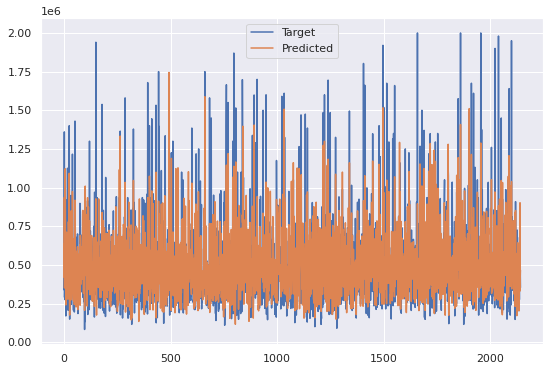

In [177]:
import matplotlib.pyplot as plt
import numpy as np
  
# create data
x = range(len(y_pred))
y1 = y_test
y2 = y_pred

# plot lines
plt.plot(x, y1, label = "Target")
plt.plot(x, y2, label = "Predicted")
plt.legend()
plt.show()